**Artificial Intelligence-Aided Analysis of Hydrogen-Based Monoclinic Structures and Modeling of Structure-Property Relationships**

**3#Machine Learning Application Steps**

Göktuğ USTA & Sedef KORKMAZ | Izmir Democracy University - Electrical and Electronics Engineering Department - 2025

goktugustaa@gmail.com 

sedefkorkmaz67@hotmail.com

Data retrieved from The Materials Project API (https://next-gen.materialsproject.org/).

In [95]:
# --- SETUP LIBRARY --- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



>Mean - The average value

>Median - The mid point value

>Variance - The average number of these squared differences


In [96]:
# --- READ DATASET --- #
data = pd.read_csv("monoclinic_hydrogen_data.csv")
df = pd.DataFrame(data)

#Our target is band_gap property.
#This means we will guess the value depends on other numerical values.
# The bandgap is the minimum energy to excite an electron in a bound state into a state to participate in conduction. 
# That means the zero-gap material have conducts electrons like a metal
# source: https://www.researchgate.net/post/What_mean_of_zero_band_gap#:~:text=The%20bandgap%20is%20the%20minimum,conducts%20electrons%20like%20a%20metal
target = "band_gap"

df

,material_id,formula,elements,volume,density,band_gap,magnetization,lattice_a,lattice_b,lattice_c
0,mp-995200,HC3,"[Element C, Element H]",73.158575,1.681455,0.0000,0.000012,2.463933,3.663947,8.107367
1,mp-1217971,Ta2H,"[Element H, Element Ta]",38.193485,15.777973,0.0000,0.000000,2.919064,2.919064,4.883885
2,mp-642644,V2H,"[Element H, Element V]",28.577852,5.978561,0.0000,0.000005,2.656866,2.656866,4.428967
3,mp-995184,HC2,"[Element C, Element H]",58.118465,1.430258,0.0000,0.000014,6.332870,6.332870,3.813987
4,mp-995197,HC,"[Element C, Element H]",148.834584,1.161986,3.5572,0.001015,6.103390,6.103390,4.861911
...,...,...,...,...,...,...,...,...,...,...
4265,mp-728691,CrH20S2(NO7)2,"[Element Cr, Element H, Element N, Element O, ...",721.771218,1.786634,2.8716,7.999015,12.898387,6.136122,9.542887
4266,mp-734433,Cd4NiH20(ClO)10,"[Element Cd, Element Cl, Element H, Element Ni...",1261.209766,2.746531,4.0612,4.001552,12.047199,6.728403,16.464021
4267,mp-744309,NiH20Se2(NO7)2,"[Element H, Element N, Element Ni, Element O, ...",983.167225,1.651059,0.4678,16.000570,14.501992,7.344986,9.553221
4268,mp-758504,K2Mg3P4(H5O6)4,"[Element H, Element K, Element Mg, Element O, ...",1036.151893,2.176818,5.2116,0.000017,6.649072,7.598299,20.541554


In [97]:
#Mean
mean_volume = np.mean(df["volume"])
mean_density = np.mean(df["density"])
mean_bandgap = np.mean(df["band_gap"])

#Standart Deviation 
std_volume = np.std(df["volume"])
std_density = np.std(df["density"])
std_bandgap = np.std(df["band_gap"])

#Variance 
var_volume = np.var(df["volume"])
var_density = np.var(df["density"])
var_bandgap = np.var(df["band_gap"])

#printing results
print("Mean Volume:", mean_volume, "\n", "Mean Density:", mean_density, "\n", "Mean Band_Gap:", mean_bandgap)
print("\nStandart Deviation Volume:", std_volume, "\n", "Standart Deviation Density:", std_density, "\n", "Standart Deviation Band_Gap:", std_bandgap)
print("\nVariance Volume:", var_volume, "\n", "Variance Density:", var_density, "\n", "Variance Band_Gap:", var_bandgap)

Mean Volume: 779.0387493218179 
 Mean Density: 2.5408931294439294 
 Mean Band_Gap: 2.8787096792338303

Standart Deviation Volume: 562.5260167657834 
 Standart Deviation Density: 1.0586195374580254 
 Standart Deviation Band_Gap: 1.7780046779138832

Variance Volume: 316435.51953837846 
 Variance Density: 1.1206753250878434 
 Variance Band_Gap: 3.1613006346836516


In [98]:
"""
perc_volume = np.percentile(df["volume"], 50)
perc_density = np.percentile(df["density"], 50)
perc_bandgap = np.percentile(df["band_gap"], 50)
print("\Percentile Volume:", perc_volume, "\n", "Percentile Density:", perc_density, "\n", "Percentile Band_Gap:", perc_bandgap)
"""

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Goktug\AppData\Local\Temp\ipykernel_18024\1996302925.py:1: SyntaxWarning: invalid escape sequence '\P'
  """


'\nperc_volume = np.percentile(df["volume"], 50)\nperc_density = np.percentile(df["density"], 50)\nperc_bandgap = np.percentile(df["band_gap"], 50)\nprint("\\Percentile Volume:", perc_volume, "\n", "Percentile Density:", perc_density, "\n", "Percentile Band_Gap:", perc_bandgap)\n'

In [99]:
# --- TRAIN TEST SPLIT --- #
X = df.select_dtypes(include=np.number).drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#len(X_train) + len(X_test)

In [100]:
X

,volume,density,magnetization,lattice_a,lattice_b,lattice_c
0,73.158575,1.681455,0.000012,2.463933,3.663947,8.107367
1,38.193485,15.777973,0.000000,2.919064,2.919064,4.883885
2,28.577852,5.978561,0.000005,2.656866,2.656866,4.428967
3,58.118465,1.430258,0.000014,6.332870,6.332870,3.813987
4,148.834584,1.161986,0.001015,6.103390,6.103390,4.861911
...,...,...,...,...,...,...
4265,721.771218,1.786634,7.999015,12.898387,6.136122,9.542887
4266,1261.209766,2.746531,4.001552,12.047199,6.728403,16.464021
4267,983.167225,1.651059,16.000570,14.501992,7.344986,9.553221
4268,1036.151893,2.176818,0.000017,6.649072,7.598299,20.541554


In [101]:
y

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       3.5572
         ...  
4265    2.8716
4266    4.0612
4267    0.4678
4268    5.2116
4269    4.1761
Name: band_gap, Length: 4270, dtype: float64

In [102]:
# --- SCALING --- #
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

print(f"Train: {scaled_X_train.shape}")
print(f"Test: {scaled_X_test.shape}")
print("Properties:", X.columns.tolist())

Train: (3416, 6)
Test: (854, 6)
Properties: ['volume', 'density', 'magnetization', 'lattice_a', 'lattice_b', 'lattice_c']


In [103]:
#--- ALGORITHMS --- #
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

results = []
models = {
    "Linear Reg": LinearRegression(),
    "Ridge Reg": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

In [104]:
# Testing all models 
for name, model in models.items():
    model.fit(scaled_X_train, y_train) # fitting each models
    y_pred = model.predict(scaled_X_test) # predicted target
    
    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})
    print(f"[{name}] Completed -> R2: {r2:.4f},  RMSE: {rmse:.4f}")


[Linear Reg] Completed -> R2: 0.1631,  RMSE: 1.6451
[Ridge Reg] Completed -> R2: 0.1631,  RMSE: 1.6452
[Random Forest] Completed -> R2: 0.3846,  RMSE: 1.4107
[Gradient Boosting] Completed -> R2: 0.3903,  RMSE: 1.4042
[XGBoost] Completed -> R2: 0.3325,  RMSE: 1.4692
[CatBoost] Completed -> R2: 0.3924,  RMSE: 1.4018


*Each model tested one by one below. If you wonder the process take a look below.*

**Linear Regression**

In [105]:
# from sklearn.linear_model import LinearRegression
# linear_regression = LinearRegression()
# linear_regression.fit(scaled_X_train, y_train)
# call the model's predict method instead of calling the model object
# linear_regression_y_predict = linear_regression.predict(scaled_X_test)

# results.append(["Linear Regression", linear_regression, linear_regression_y_predict])

**L2 Regularization**

In [106]:
# from sklearn.linear_model import Ridge

# l2_regulatization = Ridge(alpha=1.0)
# l2_regulatization.fit(scaled_X_train, y_train)
# l2_regulatization_y_predict = l2_regulatization.predict(scaled_X_test)

# model_results("Ridge Regression", l2_regulatization, l2_regulatization_y_predict)

**Random Forest**

In [107]:
# from sklearn.ensemble import RandomForestRegressor

# random_forest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# random_forest.fit(scaled_X_train, y_train)
# random_forest_y_predict = random_forest.predict(scaled_X_test)

# model_results("Random Forest", random_forest, random_forest_y_predict)

**Gradient Boosting Regressor**

In [108]:
# from sklearn.ensemble import GradientBoostingRegressor
# gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gradient_boosting.fit(scaled_X_train, y_train)
# gradient_boosting_y_predict = gradient_boosting.predict(scaled_X_test)

# model_results("Gradient Boosting", gradient_boosting, gradient_boosting_y_predict)

**XG Boost**

In [109]:
# from xgboost import XGBRegressor

# xg_boost = XGBRegressor(n_estimators=100, learning_rate=0.1, n_jobs=-1, random_state=42)
# xg_boost.fit(scaled_X_train, y_train)
# xg_boost_y_predict = xg_boost.predict(scaled_X_test)

# model_results("XGBoost", xg_boost, xg_boost_y_predict)

**Cat Boost**

In [110]:
# from catboost import CatBoostRegressor

# cat_boost = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42)
# cat_boost.fit(scaled_X_train, y_train)
# cat_boost_y_predict = xg_boost.predict(scaled_X_test)

# model_results("Cat Boost", cat_boost, cat_boost_y_predict)

*Compare the results of model performances*

In [111]:

# results_df = pd.DataFrame(results)

# plt.figure(figsize=(12, 6))
# sns.barplot(x="R2", y="model_name", data=results_df, palette="viridis")
# plt.title("Model Performance", fontsize=15)
# plt.xlabel("R2 Score", fontsize=10)
# plt.xlim(0, 1)
# plt.grid(axis='x', linestyle='--', alpha=0.8)
# plt.tight_layout()
# plt.show()

# # Determine best model by highest R2 (avoid sorting list of dicts directly)
# if results_df.empty:
# 	best_model = None
# 	print("No model results available.")
# else:
# 	best_row = results_df.sort_values(by="R2", ascending=False).iloc[0]
# 	best_model = best_row["model_name"]
# 	print("Best model:", best_model)
# 	print("Best model metrics:", best_row.to_dict())

# results_df

**Material Agent Interface**

C:\Users\Goktug\AppData\Local\Temp\ipykernel_18024\3358893119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")


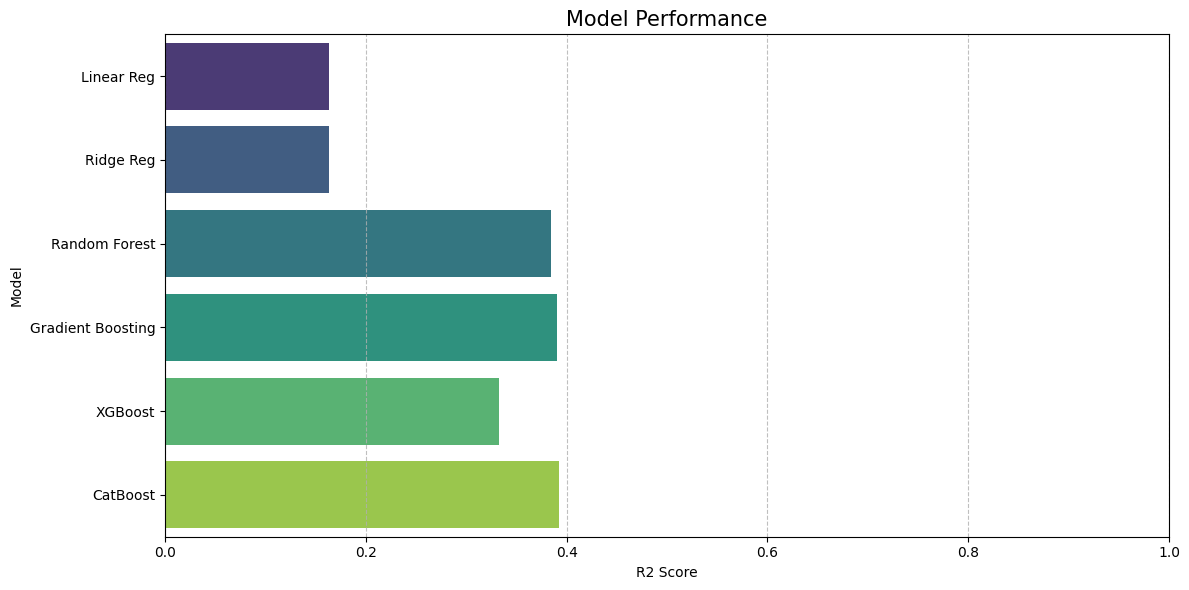

results_df columns: Index(['Model', 'RMSE', 'R2 Score'], dtype='object')

>> Best Performing Model Selected: CatBoost
>> Best model metrics: {'Model': 'CatBoost', 'RMSE': 1.401769839678899, 'R2 Score': 0.3924008725993652}


In [ ]:
# results_df: build dataframe from collected results (pd already imported earlier in the notebook)
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance", fontsize=15)
plt.xlabel("R2 Score", fontsize=10)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

# Select Best Model by highest R2 Score (handle empty results_df)
if results_df.empty:
	best_model = None
	best_model_name = None
	print("No model results available to select a best model.")
else:
	best_row = results_df.sort_values(by="R2 Score", ascending=False).iloc[0]
	best_model_name = best_row["Model"]
	# get the fitted model instance from the models dict (models defined and fitted earlier)
	best_model = models.get(best_model_name)
	if best_model is None:
		print(f"Best model name '{best_model_name}' not found in models dictionary.")
	else:
		print(f"\n>> Best Performing Model Selected: {best_model_name}")
		print(">> Best model metrics:", best_row.to_dict())

In [120]:
df_ml

,volume,density,total_magnetization,lattice_a,lattice_b,lattice_c
0,73.158575,1.681455,0.000012,2.463933,3.663947,8.107367
1,38.193485,15.777973,0.000000,2.919064,2.919064,4.883885
2,28.577852,5.978561,0.000005,2.656866,2.656866,4.428967
3,58.118465,1.430258,0.000014,6.332870,6.332870,3.813987
4,148.834584,1.161986,0.001015,6.103390,6.103390,4.861911
...,...,...,...,...,...,...
4265,1427.360028,1.601408,0.304529,14.783104,9.882808,10.399206
4266,1798.993826,1.973106,0.100257,11.577149,10.157364,19.009727
4267,1292.132094,2.873546,0.052465,15.803067,5.499770,15.254800
4268,652.119114,0.887154,0.004014,5.961792,10.739156,10.375603


In [133]:
def run_prediction_agent(model, scaler, df, feature_columns):
    print("\n--- Band Gap Inference Agent ---")
    print("System Ready. Type 'exit' to cancel.\n")

    while True:
        formula_input = input(">> Enter Chemical Formula (e.g., H2O, HCl): ").strip()
        
        if formula_input.lower() == 'exit':
            print("Agent shutting down.")
            break

        # Case-insensitive search
        search_results = df[df["formula"].str.lower() == formula_input.lower()]

        # --- SCENARIO 1: Material Found in Database ---
        if not search_results.empty:
            print(f"\n[+] Success: Material '{formula_input}' found in repository.")
            
            record = search_results.iloc[0]
            true_val = record.get("band_gap", "N/A")
            
            # Display properties
            print(f"- Volume: {record.get('volume', 0):.4f}")
            print(f"- Density: {record.get('density', 0):.4f}")
            print(f"- Magnetization: {record.get('total_magnetization', 0):.4f}")
            
            # Prepare input vector for the model
            # We select only the columns that were used during training
            try:
                input_vector = pd.DataFrame([record])[feature_columns]
                
                # Scale and Predict
                input_scaled = scaler.transform(input_vector)
                prediction = model.predict(input_scaled)[0]

                print(f"\nPredicted Band Gap: {prediction:.4f} eV")
                
                if isinstance(true_val, (int, float)):
                    diff = abs(true_val - prediction)
                    print(f"True Value: {true_val:.4f} eV (Error: {diff:.4f})")
            
            except KeyError as e:
                print(f"Error: Missing feature columns in dataset: {e}")

        # --- SCENARIO 2: Material Not Found (Manual Input Mode) ---
        else:
            print(f"\n[-]'{formula_input}' not found. Initiating Manual Feature Entry...")
            
            try:
                print("    Please provide physical properties for estimation:")
                
                # Using a dictionary for cleaner data collection
                user_data = {
                    "volume": float(input("- Volume: ")),
                    "density": float(input("- Density: ")),
                    "total_magnetization": float(input("- Total Magnetization: ")),
                    "lattice_a": float(input("- Lattice a: ")),
                    "lattice_b": float(input("- Lattice b: ")),
                    "lattice_c": float(input("- Lattice c: "))
                }
                
                # Create DataFrame ensuring column order matches training data
                new_data = pd.DataFrame([user_data])
                
                # Ensure we have all necessary columns (fill zeros if missing/not asked)
                # This aligns user input with the model's expected feature set
                for col in feature_columns:
                    if col not in new_data.columns:
                        new_data[col] = 0.0 # Default value for missing features
                
                # Reorder columns to match training data
                new_data = new_data[feature_columns]

                # Scale and Predict
                new_data_scaled = scaler.transform(new_data)
                final_prediction = model.predict(new_data_scaled)[0]
                
                print(f"\nEstimated Band Gap for {formula_input}: {final_prediction:.4f} eV")

                # Classification Logic
                material_type = "Metal (Conductor)" if final_prediction < 0.1 else "Semiconductor/Insulator"
                print(f">Classification: {material_type}")

            except ValueError:
                print("Invalid Input. Please enter numeric values only.")
        
        print("\n" + "-"*50 + "\n")
    
if 'best_model' in locals() and 'scaler' in locals():
    feature_cols = X_train.columns.tolist()
    run_prediction_agent(best_model, scaler, df, feature_cols)
else:
    print("Error: Model not found. Please run the training step first.")


--- Band Gap Inference Agent ---
System Ready. Type 'exit' to cancel.


[-]'NH' not found. Initiating Manual Feature Entry...
    Please provide physical properties for estimation:

Estimated Band Gap for NH: 2.3668 eV
>Classification: Semiconductor/Insulator

--------------------------------------------------


[+] Success: Material 'HN' found in repository.
- Volume: 365.5706
- Density: 1.3640
- Magnetization: 0.0000

Predicted Band Gap: 4.6953 eV
True Value: 4.3630 eV (Error: 0.3323)

--------------------------------------------------


[-]'HCO2' not found. Initiating Manual Feature Entry...
    Please provide physical properties for estimation:
Invalid Input. Please enter numeric values only.

--------------------------------------------------


[+] Success: Material 'h(co)2' found in repository.
- Volume: 221.7617
- Density: 1.7081
- Magnetization: 0.0000

Predicted Band Gap: 3.7977 eV
True Value: 2.8934 eV (Error: 0.9043)

--------------------------------------------------

Agen